In [20]:
#notes on using sklearn uses median age of inventory as data
import pandas as pd
pd.options.display.max_columns = 9999
pd.options.display.max_rows = 10
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#median age of currently listed homes
inventory = pd.read_csv('MedianAgeOfInventory_NSA_AllHomes_Metro.csv', encoding='latin')

/Users/bort/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
pd.options.display.max_rows = 999
inventory.head()

SizeRank  RegionID                          RegionName RegionType  \
0         0    102001                       United States    Country   
1         1    394913                        New York, NY        Msa   
2         2    753899  Los Angeles-Long Beach-Anaheim, CA        Msa   
3         3    394463                         Chicago, IL        Msa   
4         4    394514               Dallas-Fort Worth, TX        Msa   

  StateName  2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
0       NaN    109.0    100.0     86.0     76.0     74.0     74.0     77.0   
1        NY    126.0    120.0     90.0     74.0     71.0     76.0     83.0   
2        CA     68.0     34.0     38.0     38.0     37.0     37.0     36.0   
3        IL    119.0    110.0     86.0     70.0     69.0     69.0     69.0   
4        TX     89.0     73.0     56.0     53.0     53.0     55.0     53.0   

   2013-08  2013-09  2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  \
0     76.0     82.0     84.0     88.0     94.0    103.0    102.0     90.0   
1     85.0     90.0     89.0     92.0     96.0    104.0    103.0     84.0   
2     39.0     42.0     46.0     52.0     58.0     62.0     43.0     39.0   
3     68.0     72.0     77.0     84.0     91.0    103.0     98.0     71.0   
4     53.0     58.0     66.0     69.0     76.0     80.0     68.0     50.0   

   2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  \
0     71.0     66.0     66.0     71.0     77.0     84.0     88.0     92.0   
1     68.0     63.0     69.0     75.0     83.0     89.0     92.0     94.0   
2     41.0     41.0     42.0     45.0     48.0     54.0     54.0     55.0   
3     54.0     52.0     54.0     62.0     67.0     72.0     79.0     87.0   
4     46.0     45.0     43.0     46.0     49.0     56.0     64.0     64.0   

   2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  \
0    100.0    106.0    102.0     87.0     66.0     60.0     62.0     68.0   
1     98.0    102.0    101.0     80.0     67.0     58.0     60.0     71.0   
2     62.0     69.0     48.0     42.0     38.0     41.0     42.0     44.0   
3     96.0    102.0     91.0     64.0     53.0     54.0     62.0     65.0   
4     71.0     73.0     52.0     42.0     41.0     40.0     42.0     43.0   

   2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  2016-02  2016-03  \
0     74.0     78.0     84.0     87.0     96.0    103.0     98.0     72.0   
1     80.0     90.0     91.0     96.0     98.0    104.0     99.0     70.0   
2     47.0     50.0     54.0     54.0     63.0     68.0     45.0     39.0   
3     71.0     78.0     84.0     88.0     97.0    107.0    101.0     61.0   
4     44.0     51.0     57.0     62.0     67.0     72.0     62.0     43.0   

   2016-04  2016-05  2016-06  2016-07  2016-08  2016-09  2016-10  2016-11  \
0     68.0     64.0     68.0     72.0     77.0     82.0     86.0     91.0   
1     63.0     64.0     69.0     78.0     87.0     90.0     91.0     95.0   
2     40.0     40.0     43.0     48.0     49.0     52.0     55.0     57.0   
3     57.0     56.0     62.0     70.0     75.0     80.0     84.0     93.0   
4     45.0     47.0     49.0     50.0     50.0     56.0     62.0     64.0   

   2016-12  2017-01  2017-02  2017-03  2017-04  2017-05  2017-06  2017-07  \
0     99.0    104.0    102.0     86.0     68.0     62.0     64.0     69.0   
1     98.0    102.0     94.0     71.0     60.0     56.0     64.0     71.0   
2     66.0     70.0     58.0     44.0     36.0     38.0     41.0     43.0   
3    103.0    111.0     98.0     58.0     52.0     54.0     59.0     64.0   
4     70.0     73.0     64.0     50.0     46.0     43.0     46.0     48.0   

   2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
0     72.0     77.0     81.0     85.0     92.0     98.0     90.0     66.0   
1     78.0     83.0     82.0     84.0     92.0     99.0     78.0     51.0   
2     46.0     48.0     50.0     51.0     62.0     63.0     34.0     35.0   
3     69.0     

In [5]:
test = inventory.loc[inventory['2019-10'].isnull()]
test

SizeRank  RegionID                  RegionName RegionType StateName  \
719       716    394366              Batesville, AR        Msa        AR   
789       786    395206  Washington Court House, OH        Msa        OH   
812       809    394791               Lexington, NE        Msa        NE   
884       879    394968                   Pecos, TX        Msa        TX   

     2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2013-09  2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2014-05  2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2015-09  2015-10  2015-11  2015-12  2016-01  2016-02  2016-03  2016-04  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2016-05  2016-06  2016-07  2016-08  2016-09  2016-10  2016-11  2016-12  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2017-01  2017-02  2017-03  2017-04  2017-05  2017-06  2017-07  2017-08  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2018-05  2018-06  2018-07  2018-08  2018-09  2018-10  2018-11  2018-12  \
719      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
789      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
812      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
884      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

     2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2

In [6]:
#must remove null values for models to work
inventory1 = inventory.loc[inventory['2019-10'].notnull() & inventory['2019-11'].notnull() & 
                          inventory['2019-12'].notnull() & inventory['2020-01'].notnull()]
inventory1

SizeRank  RegionID                              RegionName RegionType  \
0           0    102001                           United States    Country   
1           1    394913                            New York, NY        Msa   
2           2    753899      Los Angeles-Long Beach-Anaheim, CA        Msa   
3           3    394463                             Chicago, IL        Msa   
4           4    394514                   Dallas-Fort Worth, TX        Msa   
5           5    394974                        Philadelphia, PA        Msa   
6           6    394692                             Houston, TX        Msa   
7           7    395209                          Washington, DC        Msa   
8           8    394856               Miami-Fort Lauderdale, FL        Msa   
9           9    394347                             Atlanta, GA        Msa   
10         10    394404                              Boston, MA        Msa   
11         11    395057                       San Francisco, CA        Msa   
12         12    394532                             Detroit, MI        Msa   
13         13    395025                           Riverside, CA        Msa   
14         14    394976                             Phoenix, AZ        Msa   
15         15    395078                             Seattle, WA        Msa   
16         16    394865                 Minneapolis-St Paul, MN        Msa   
17         17    395056                           San Diego, CA        Msa   
18         18    395121                           St. Louis, MO        Msa   
19         19    395148                               Tampa, FL        Msa   
20         20    394358                           Baltimore, MD        Msa   
21         21    394530                              Denver, CO        Msa   
22         22    394982                          Pittsburgh, PA        Msa   
23         23    394998                            Portland, OR        Msa   
24         24    394458                           Charlotte, NC        Msa   
25         25    395045                          Sacramento, CA        Msa   
26         26    395055                         San Antonio, TX        Msa   
27         27    394943                             Orlando, FL        Msa   
28         28    394466                          Cincinnati, OH        Msa   
29         29    394475                           Cleveland, OH        Msa   
30         30    394735                         Kansas City, MO        Msa   
31         31    394775                           Las Vegas, NV        Msa   
32         32    394492                            Columbus, OH        Msa   
33         33    395059                            San Jose, CA        Msa   
34         34    394355                              Austin, TX        Msa   
35         35    395194                      Virginia Beach, VA        Msa   
36         36    394902                           Nashville, TN        Msa   
37         37    395005                          Providence, RI        Msa   
38         38    394862                           Milwaukee, WI        Msa   
39         39    394714                        Jacksonville, FL        Msa   
40         40    394849                             Memphis, TN        Msa   
41         41    394935                       Oklahoma City, OK        Msa   
42         42    394807         Louisville-Jefferson County, KY        Msa   
43         43    394669                            Hartford, CT        Msa   
44         44    395022                            Richmond, VA        Msa   
45         45    394910                         New Orleans, LA        Msa   
46         46    394425                             Buffalo, NY        Msa   
47         47    395012                             Raleigh, NC        Msa   
48         48    394388                          Birmingham, AL        Msa   
49         49    395053                      Salt Lake City, UT        Msa   
50         50    395031    

In [7]:
# 1. the value we want to predict
y = inventory1['2020-02']

In [8]:
# 2. the input values used to generate model
x = inventory1[['2019-10','2019-11','2019-12','2020-01']]

In [9]:
# 3. use DecisionTreeRegressor to generate model
inventory_model = DecisionTreeRegressor(random_state=1)
inventory_model.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [10]:
# 4. use model to predict first 20 entries
print(inventory_model.predict(x.loc[:20]))

[90. 91. 50. 89. 55. 79. 83. 58. 96. 73. 54. 20. 84. 70. 40. 40. 64. 48.
 92. 62. 78.]


In [11]:
# 5. measure how well the model fits actual data by generating mean_absolute_error
predicted_inventory = inventory_model.predict(x)
mean_absolute_error(y, predicted_inventory)


0.0

In [12]:
# putting it all together - split data into x, y for training and x, y for calculating mean_absolute_error
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)
# Define model
inventory_model = DecisionTreeRegressor()
# Fit model
inventory_model.fit(train_x, train_y)

# get predicted prices on validation data
val_predictions = inventory_model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))

11.628959276018099


In [13]:
#puttin it all together even more: find model with nodes that fits the best
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

leaf_nodes = [5, 50, 500, 5000]
for max_leaf_nodes in leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error: %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error: 11
Max leaf nodes: 50  		 Mean Absolute Error: 9
Max leaf nodes: 500  		 Mean Absolute Error: 11
Max leaf nodes: 5000  		 Mean Absolute Error: 11


In [14]:
#last step is to use number of nodes that fit best to calculate prediction
final_model = DecisionTreeRegressor(max_leaf_nodes = 50, random_state=1)

# fit the final model
final_model.fit(x, y)
z = final_model.predict(x)
z

array([ 95.63541667,  95.63541667,  67.8       , 106.18461538,
        67.8       ,  93.79069767,  85.52631579,  58.58823529,
        95.63541667,  74.27272727,  68.33333333,  28.6       ,
        80.72307692,  78.54166667,  46.25      ,  58.58823529,
        78.54166667,  58.58823529,  93.79069767,  62.33333333,
        80.72307692,  53.33333333, 106.18461538,  80.72307692,
        67.8       ,  53.33333333,  67.8       ,  67.8       ,
        80.72307692,  80.72307692,  93.79069767,  80.72307692,
        58.58823529,  28.6       ,  67.8       ,  86.86363636,
        67.8       ,  80.72307692,  58.58823529,  74.27272727,
        78.54166667,  80.72307692,  78.54166667,  95.63541667,
        67.8       , 106.18461538,  74.27272727,  67.8       ,
        95.63541667,  46.25      ,  78.54166667,  80.72307692,
        46.25      ,  85.52631579,  86.86363636,  53.33333333,
        80.72307692, 120.375     ,  74.27272727, 123.48648649,
        88.        ,  95.63541667,  78.54166667, 101.76

In [23]:
x.columns

Index(['2019-10', '2019-11', '2019-12', '2020-01'], dtype='object')

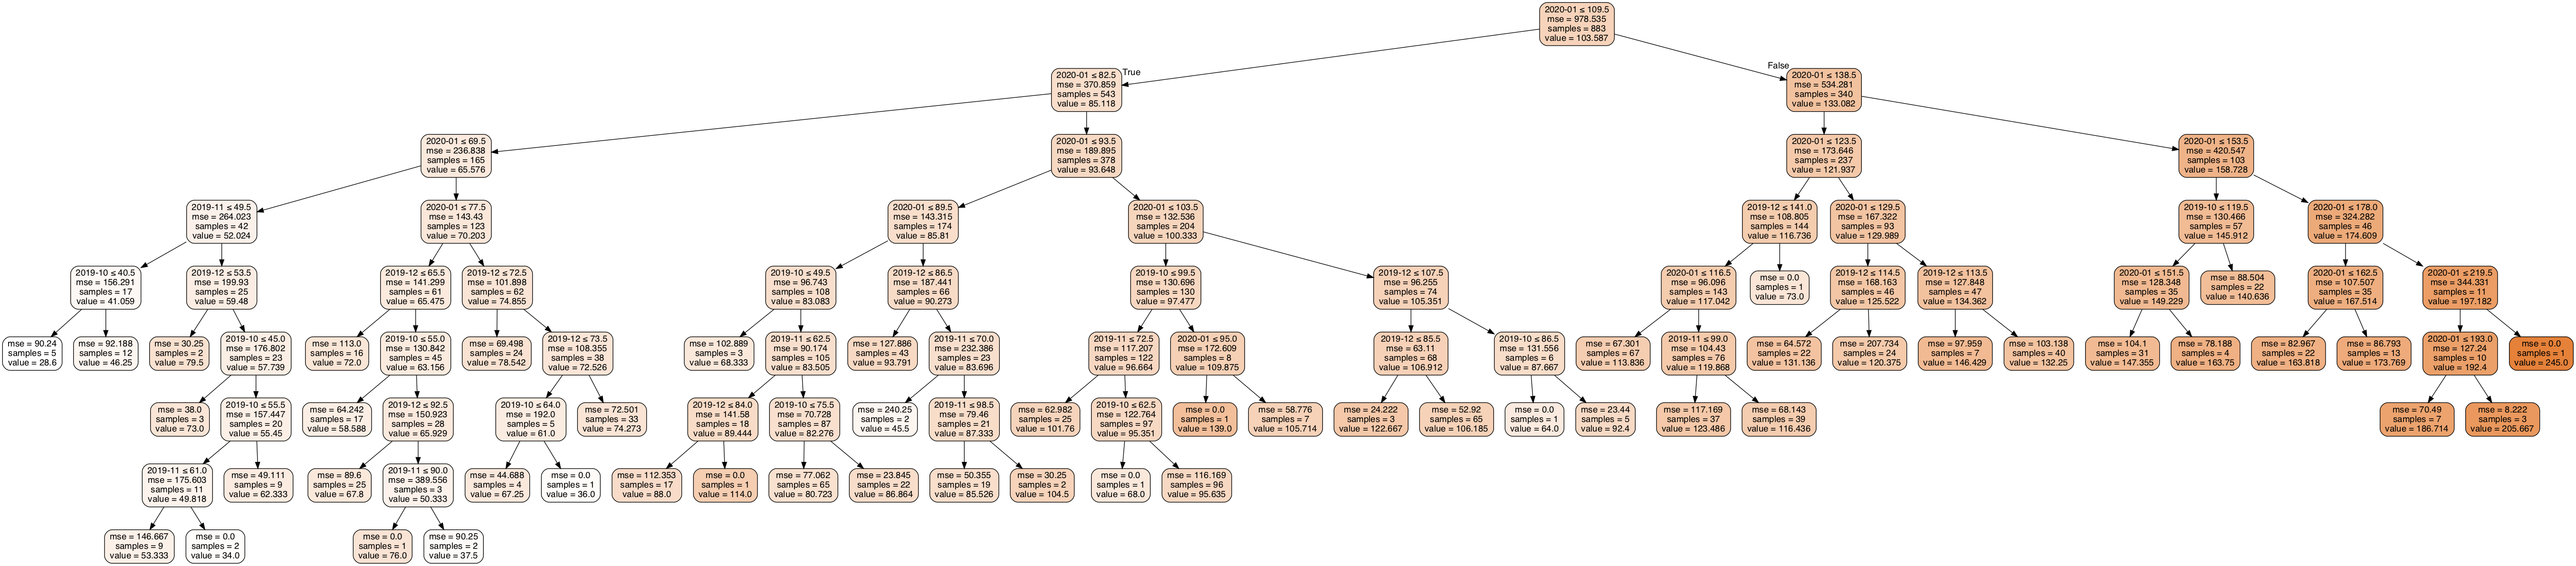

In [27]:
#visualize decision tree
dot_data = StringIO()
export_graphviz(final_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('logictreetest.png')
Image(graph.create_png())

In [ ]:
#use a different model: RandomForestRegressor this model uses many DecisionTreeRegressor and averages them out
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_x, train_y)
melb_preds = forest_model.predict(val_x)
print(mean_absolute_error(val_y, melb_preds))
